<a href="https://colab.research.google.com/github/cidcom/SatelliteCloudGenerator/blob/main/01c_Usage_Examples_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/cidcom/SatelliteCloudGenerator/blob/main/01c_Usage_Examples_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example Usage of SatelliteCloudGenerator
☁️ The following are example use cases of the [SatelliteCloudGenerator tool](https://github.com/cidcom/SatelliteCloudGenerator).

The interface is largely based in PyTorch and can be readily applied in other PyTorch projects. 🔥

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Imports and installs...
Please note the `--recurse-submodules` setting of `git clone` which is necessary to clone the internal submodule for [LocalGaussianBlur](https://github.com/mikonvergence/LocalGaussianBlur).



In [2]:
! git clone --recurse-submodules https://github.com/cidcom/SatelliteCloudGenerator.git

Cloning into 'SatelliteCloudGenerator'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 200 (delta 106), reused 121 (delta 46), pack-reused 0
Receiving objects: 100% (200/200), 30.19 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [3]:
!pip install -q torch==1.10.0 torchvision numpy imageio kornia

     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:41tcmalloc: large alloc 1147494400 bytes == 0x6555c000 @  0x7f0864825615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████████████████████| 881.9 MB 3.8 kB/s 
     |████████████████████████████████| 551 kB 66.3 MB/s 
     |████████████████████████████████| 24.3 MB 1.4 MB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 21.0 MB 12.3 MB/s 
     |████████████████████████████████| 23.2 MB 139.9 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 95.2 MB/s 
ERROR: pip's dependency resolver does not currently take into a

In [4]:
import sys
sys.path.append('./SatelliteCloudGenerator/')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from src import *
import imageio

plt.rcParams["figure.figsize"] = (20,10)
def show(tensor,*args,**kwargs):    
    plt.imshow(tensor.squeeze(0).permute(1,2,0),*args,**kwargs)

rgb_img = imageio.imread('./SatelliteCloudGenerator/imgs/rgb_example.png')[...,:3]/255
# to tensor (B,C,H,W)
rgb_img = torch.FloatTensor(rgb_img).permute(2,0,1).unsqueeze(0)

## New Feature: Shadows

Text(0.5, 1.0, 'Channel-wise Shadow Mask')

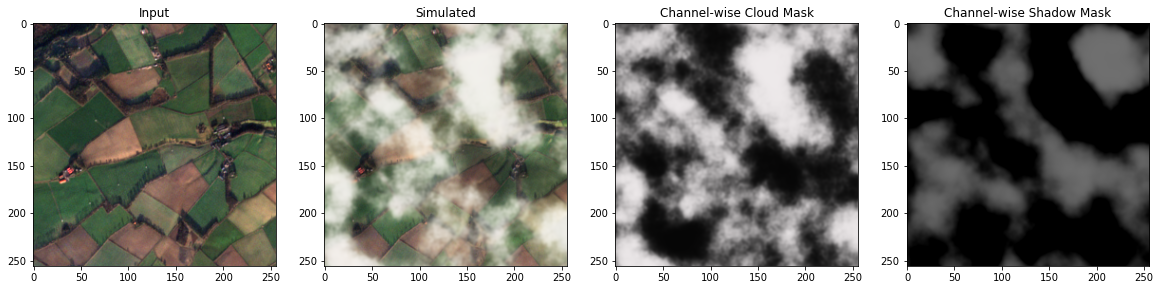

In [5]:
cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                        return_cloud=True
                                       )

plt.subplot(1,4,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,4,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,4,3)
show(cmask)
plt.title('Channel-wise Cloud Mask')
plt.subplot(1,4,4)
show(smask)
plt.title('Channel-wise Shadow Mask')

### Shadow-only

Text(0.5, 1.0, 'Channel-wise Shadow Mask')

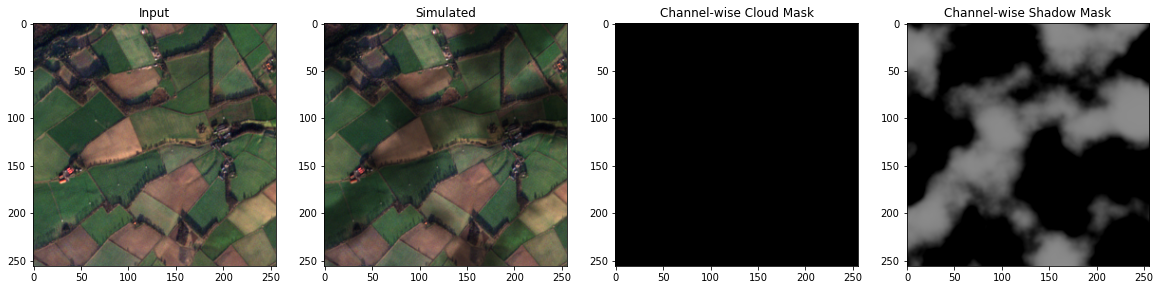

In [6]:
cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                        max_lvl=0.0,
                                        min_lvl=0.0,
                                        decay_factor=0.5,
                                        return_cloud=True
                                       )

plt.subplot(1,4,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,4,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,4,3)
show(cmask)
plt.title('Channel-wise Cloud Mask')
plt.subplot(1,4,4)
show(smask)
plt.title('Channel-wise Shadow Mask')

## Cloud Types: Thick Cloud

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

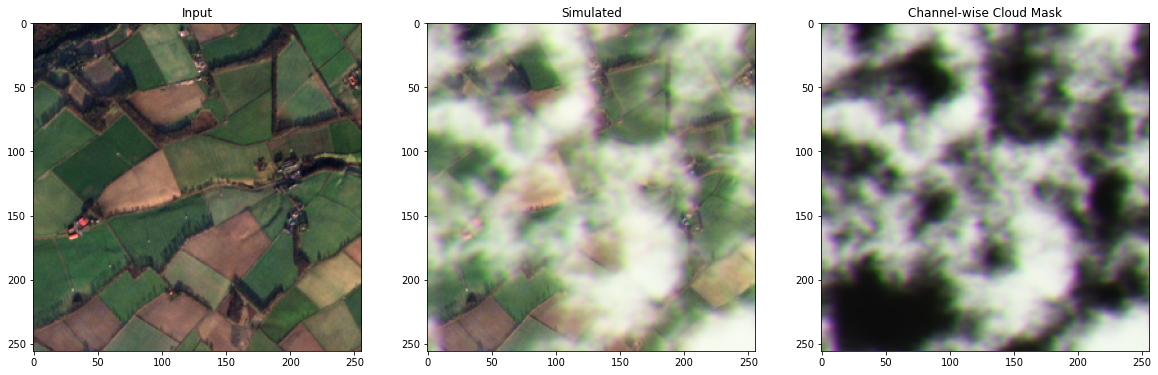

In [7]:
cl, mask = add_cloud(rgb_img,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

# Cloud Types: Thick Foggy Cloud

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

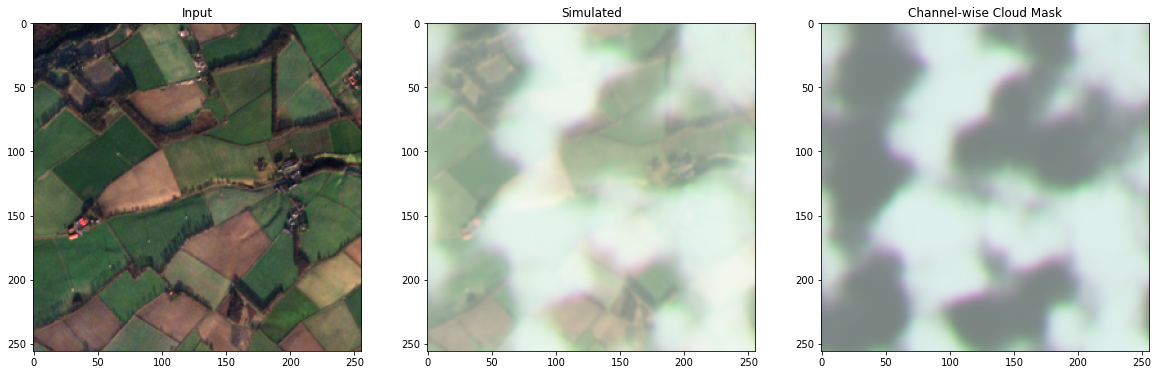

In [8]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.5,
                     max_lvl=0.9,
                     decay_factor=1.85,
                     return_cloud=True)

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

# Cloud Types: Thin Fog

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

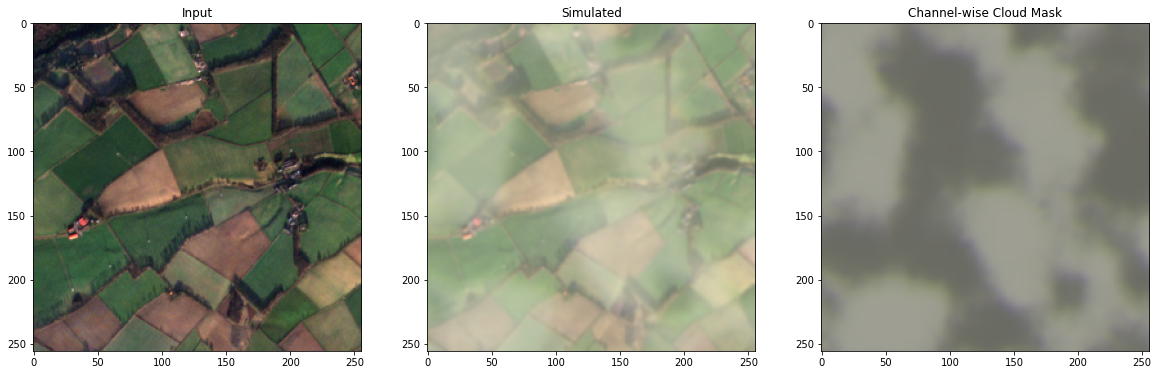

In [9]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.4,
                     max_lvl=0.6,
                     decay_factor=1.5,
                     return_cloud=True)

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

## Inverted Cloud Example
For some sensors, like IR, the clouds may actually decrease the level of reflected power, meaning that cloud regions can appear darker. For those cases, `invert=True` argument can be used to invert the cloud as shown below.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

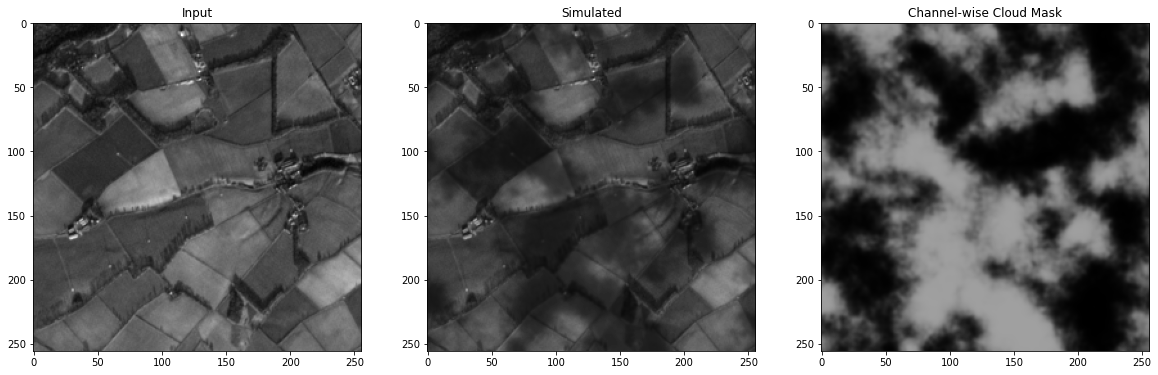

In [10]:
gray_img=rgb_img.mean(1,keepdim=True)

cl, mask = add_cloud(gray_img,
                     max_lvl = 0.6,                    
                     invert=True,
                     blur_scaling=1.0,
                     return_cloud=True
                    )
plt.subplot(1,3,1)
show(gray_img, cmap='gray')
plt.title('Input')
plt.subplot(1,3,2)
show(cl,vmin=0.0,vmax=1.0, cmap='gray')
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask,vmin=0.0,vmax=1.0, cmap='gray')
plt.title('Channel-wise Cloud Mask')

# Parameter Ablations
## 1. Basic Cloud

A basic cloud with `max_lvl` of ground component (`1.0` guarantees some clear pixels) and `min_lvl` that controles the maximum value of cloud strength (`1.0` guarantees some pixels with non-transparent cloud).

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

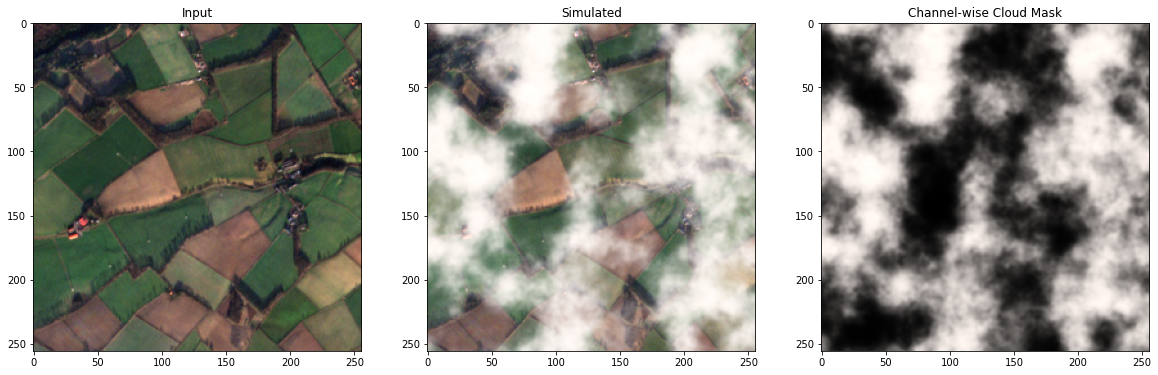

In [11]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=False,
                     channel_offset=0,
                     blur_scaling=0,
                     return_cloud=True)

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

## 2. Cloud Color

The color of the cloud component (white by default) can be adjusted with the average color from the clear underlying image by setting `cloud_color` to `True`.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

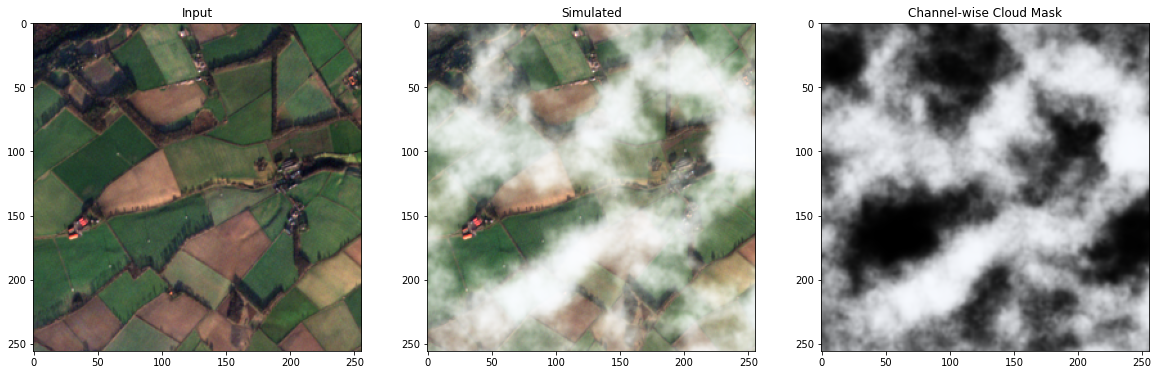

In [12]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=True,
                     channel_offset=0,
                     blur_scaling=0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

## 3. Channel Offset

The `channel_offset` setting controls the maximum positional offset in `x` or `y` direction between the channel-specific cloud masks and the base cloud mask (The value is sampled uniformly from the range `[-channel_offset,+channel_offset]`).

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

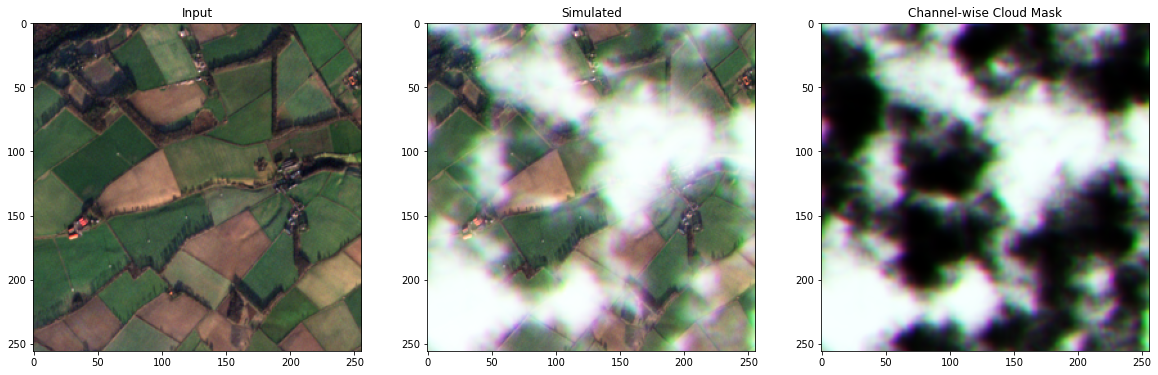

In [13]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=False,
                     channel_offset=3,
                     blur_scaling=0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

## 4. Blur Under Cloud

By setting blur_scaling argument to a value different than `0.0`, a locally varying Gaussian blur can be applied. The standard deviation is proportional to the cloud strength (ranging between `0` and `1`) multplied by the `blur_scaling`

 factor.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

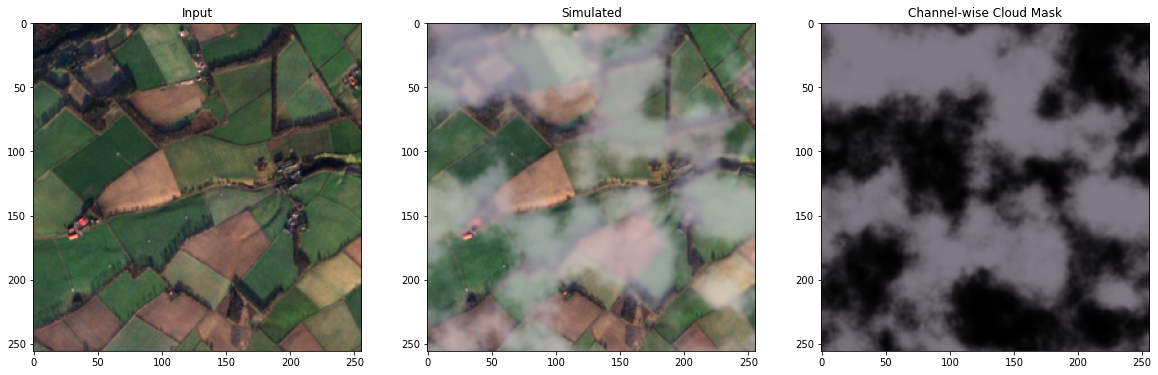

In [14]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=0.5,
                     cloud_color=False,
                     channel_offset=0,
                     blur_scaling=4.0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

## 5. Channel-Specific Cloud Magnitude
You can set `channel_magnitude_shift` to achieve slightly different cloud strengths depending on the channel.

(For visualization, this effect has been made quite extreme here)

Text(0.5, 1.0, 'Channel-wise Shadow Mask')

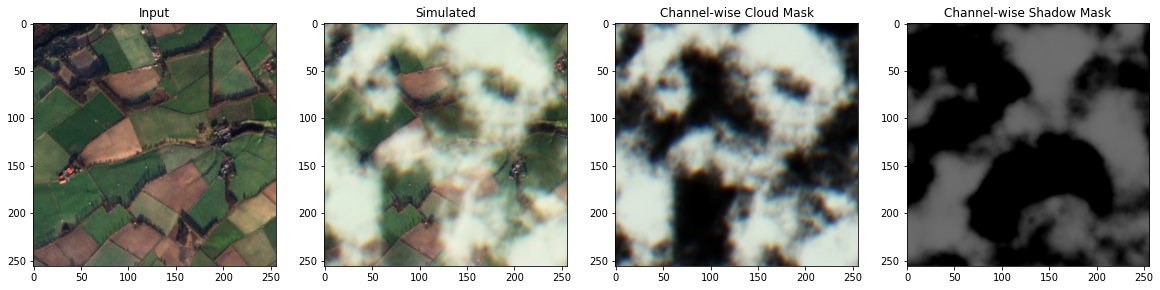

In [15]:
cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                        channel_magnitude_shift=0.5,
                                        return_cloud=True
                                       )

plt.subplot(1,4,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,4,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,4,3)
show(cmask)
plt.title('Channel-wise Cloud Mask')
plt.subplot(1,4,4)
show(smask)
plt.title('Channel-wise Shadow Mask')

## Generators and Configurations
You can create instances of `CloudGenerator` that will bind a specific configuration of the simulator.

The generators can also be used to combine several configurations using `+`, such as
```python
g1=CloudGenerator()
g2=CloudGenerator()
g3=g1|g2
```
where `g3` will randomly use one of its parent configurations (either `g1` or `g2`).

In [16]:
cfgs=[WIDE_CONFIG,
      BIG_CONFIG,
      LOCAL_CONFIG,
      FOG_CONFIG
     ]
gens=[]

for cfg in cfgs:
    gens.append(CloudGenerator(cfg,cloud_p=1.0,shadow_p=0.5))

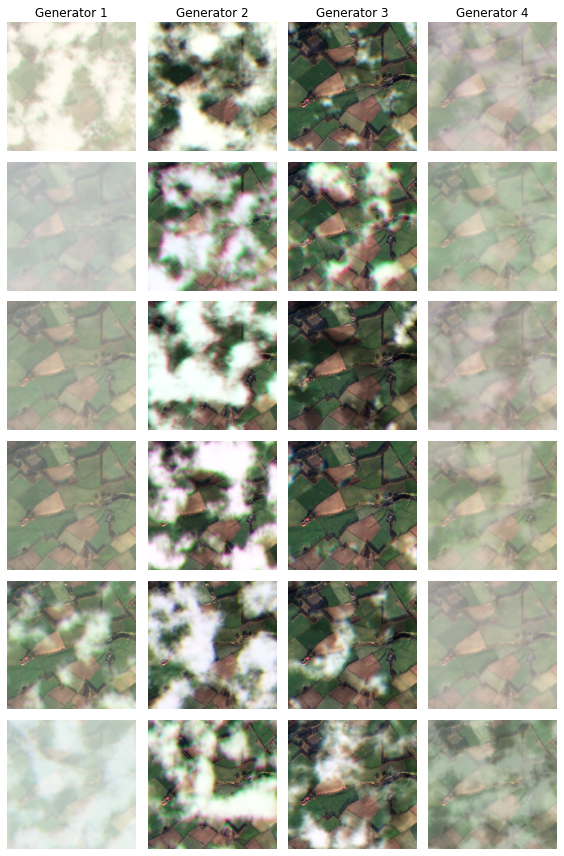

In [17]:
N=6 # number of samples
M=len(gens)

plt.figure(figsize=(8,12))
for m_idx, g in enumerate(gens):
    for n_idx in range(N):
        plt.subplot(N,M,1+M*n_idx+m_idx)
        out=g(rgb_img)
        show(out)
        plt.title('Generator {}'.format(1+m_idx)) if n_idx==0 else None
        plt.axis('off')
plt.tight_layout()

### Composition Example

In [18]:
composed_gen=gens[1]|gens[2]

print(composed_gen)

CloudGenerator(cloud_p=1.00,shadow_p=0.50,2 config(s))


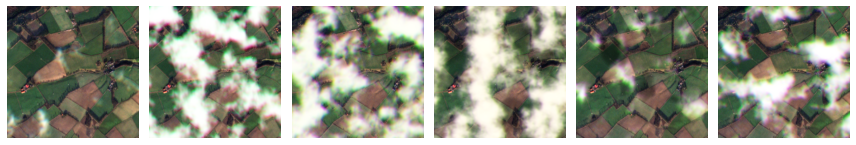

In [19]:
N=6 # number of samples

plt.figure(figsize=(12,8))
for n_idx in range(N):
    plt.subplot(1,N,1+n_idx)
    out=composed_gen(rgb_img)
    show(out)
    plt.axis('off')
plt.tight_layout()

## Segmentation Mask Example

In [20]:
# This is for visualization only...

import matplotlib.patches as mpatches

def apply_mask(image,mask):
    """
    - Used for visualization purposes    
    - applies spatial mask to all channels of the image
    """
    
    h,w,c=image.shape
    channel_mask=torch.stack(c*[mask],-1)
    
    return image*channel_mask  

def segshow(segmap,colors=None,labels=None):
    """
    Used to display a segmentation mask    
    """
    vals=segmap.unique().tolist()
    N=len(vals)
    
    if colors is None:
        colors = [(0, 0, 0)]
        
        for n in range(N-1):
            colors.append(np.random.rand(3).tolist())

    if labels is None:
        labels=['Label {}'.format(idx+1) for idx in range(N)]
        
    assert len(labels) == len(colors)
            
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom', colors, N=N)
    f=plt.imshow(segmap,cmap=cmap)
    
    cmap={val:cmap(idx/N) for idx,val in enumerate(vals)}
    labels={val:label for label,val in zip(labels,vals)}
    patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]
    plt.legend(handles=patches)
    
def segmask(img,seg,ref=None,labels=None):
    """
    Show parts of the image for specific segmentation labels
    """
    vals=seg.unique()
    N=int(len(vals))
    
    plt.figure(figsize=(N*3,3 if ref is None else 6))
    for idx,code in enumerate(vals):
        mask=seg==code

        plt.subplot(1 if ref is None else 2,N,1+idx)
        plt.imshow(apply_mask(img,mask))
        plt.title('Label: {}'.format(code if labels is None else labels[idx]))
        plt.axis('off')
        
        if ref is not None:
            plt.subplot(1 if ref is None else 2,N,1+N+idx)
            plt.imshow(apply_mask(torch.from_numpy(ref),mask))
            plt.axis('off')

    plt.tight_layout()

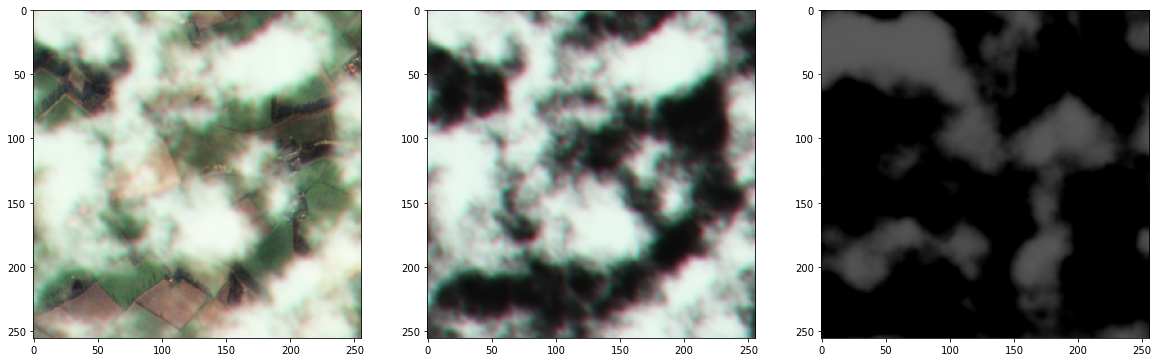

In [21]:
labels_3=["Clear Sky","Cloud","Shadow"]
labels_4=["Clear Sky","Thick Cloud","Thin Cloud","Shadow"]

cloudy,cloud_mask,shadow_mask=add_cloud_and_shadow(rgb_img,return_cloud=True)

plt.subplot(1,3,1)
show(cloudy)
plt.subplot(1,3,2)
show(cloud_mask)
plt.subplot(1,3,3)
show(shadow_mask)

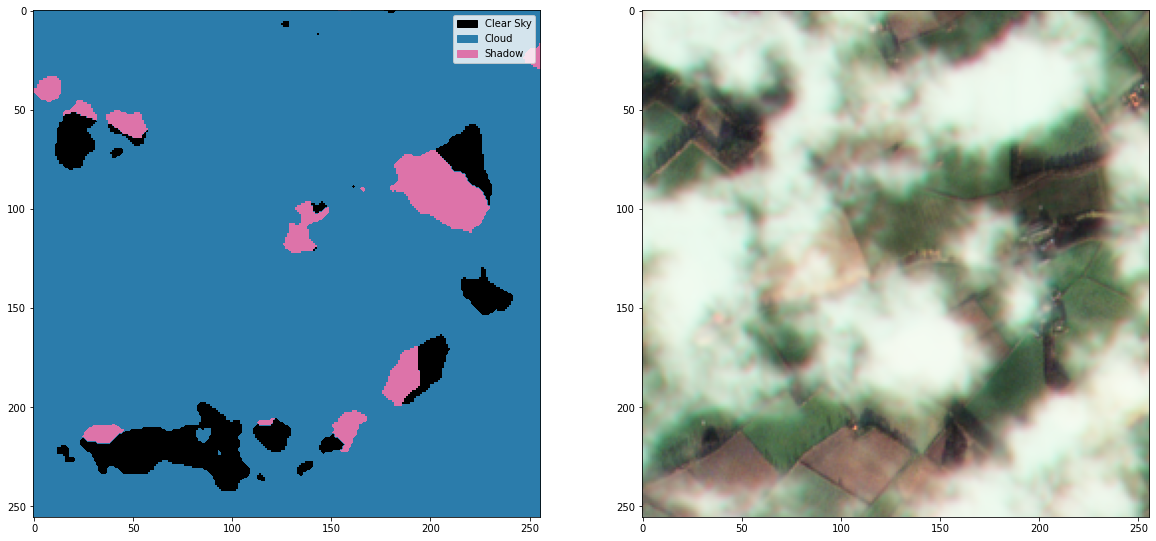

In [22]:
seg=segmentation_mask(cloud_mask[0].permute(1,2,0),
                      shadow_mask[0].permute(1,2,0))
plt.subplot(1,2,1)
segshow(seg,labels=labels_3)
plt.subplot(1,2,2)
show(cloudy)

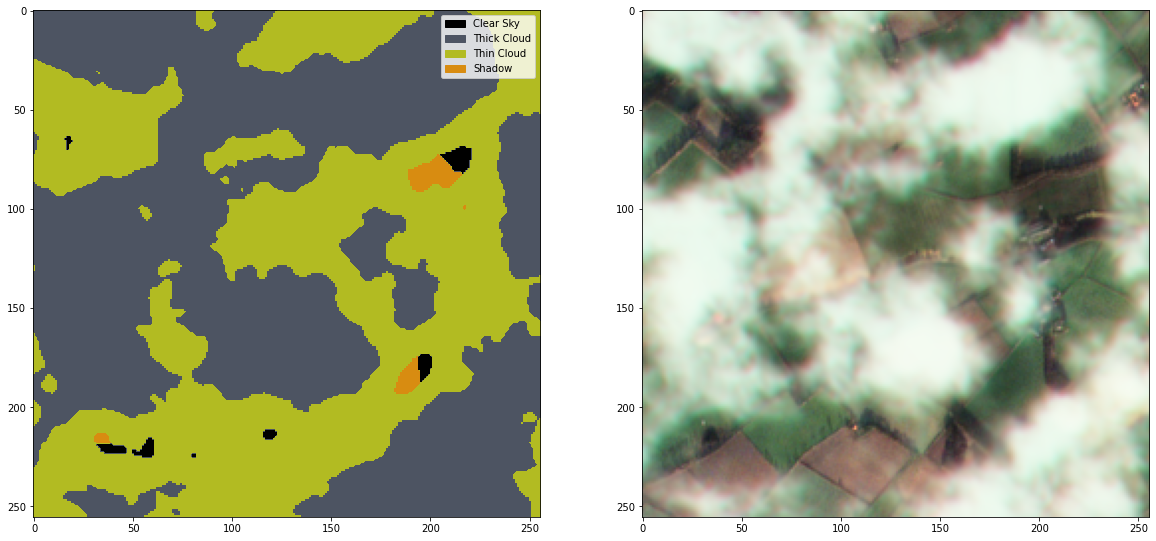

In [23]:
seg=segmentation_mask(cloud_mask[0].permute(1,2,0),
                      shadow_mask[0].permute(1,2,0),
                      thin_range=(0.05,0.5))
plt.subplot(1,2,1)
segshow(seg,labels=labels_4)
plt.subplot(1,2,2)
show(cloudy)

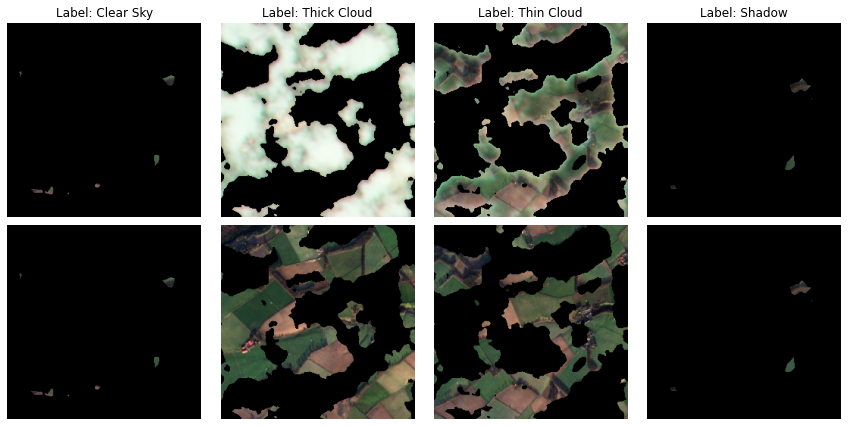

In [24]:
segmask(cloudy[0].permute(1,2,0),
        seg,
        ref=rgb_img[0].permute(1,2,0).numpy(),
        labels=labels_4)